<a href="https://colab.research.google.com/github/AmiMunshi/Image_Processing/blob/master/FrequencyDomainFiltering_(Ideal_LPF_and_Ideal%20_HPF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
img= cv2.imread("Test.tif",0) # Read the image

In [3]:
img_fft= np.fft.fft2(img, s=None, axes=(-2, -1), norm=None) # Apply FFT on origianl image

In [4]:
img_fft= np.fft.fftshift(img_fft) #Shifting the origin. Equvalent to multiplying by (-1)^x+y
img_abs= np.abs(img_fft) #Obtaining magintude of the transformed image
img_phase= np.angle(img_fft) #Obtaining the Phase of the trasnformed image
img_log= np.log10(1+img_abs) # Performing Log transformation


Text(0.5, 1.0, 'Log Transformation of the original image')

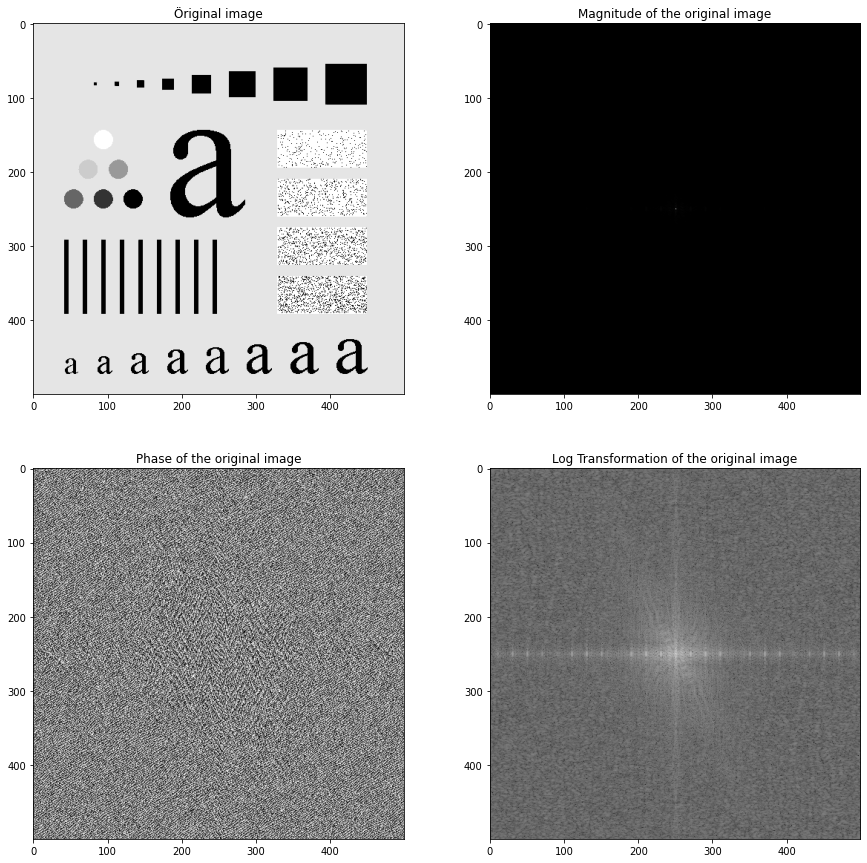

In [5]:
fig = plt.figure(figsize=(15,15),facecolor='w')
plt.subplot(2,2,1)
plt.imshow(img, cmap="gray")
plt.title("Öriginal image")
plt.subplot(2,2,2)
plt.imshow(img_abs, "gray")
plt.title("Magnitude of the original image")
plt.subplot(2,2,3)
plt.imshow(img_phase, "gray")
plt.title("Phase of the original image")
plt.subplot(2,2,4)
plt.imshow(img_log, "gray")
plt.title("Log Transformation of the original image")


In [6]:
m,n= img_fft.shape #Obtaining size (rows and cols)of the image

In [15]:
#Creating ideal lpf and ideal hpf masks
lpf= img.copy()
hpf= img.copy()
#Take radii d0= 10, 30,60,160,460

d0= 60

for i in range(m):
  for j in range(n):
    d1= np.sqrt((i-m//2)**2 +(j-n//2)**2)
    if d1>d0:
      lpf[i,j]=0
      hpf[i,j]=1
    else:
      lpf[i,j]= 1
      hpf[i,j]=0



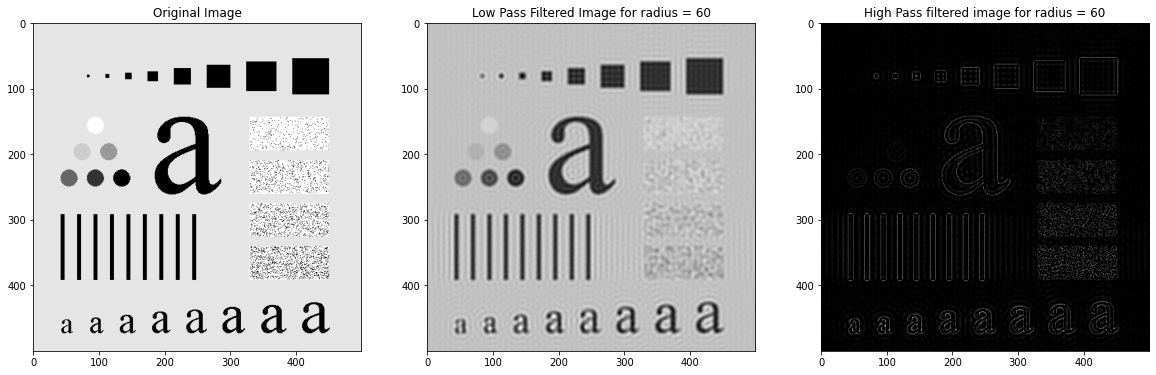

In [16]:

img_lpf= img_fft*lpf # multiply lpf mask with the fft image
img_lpf= np.fft.fftshift(img_lpf)
img_new_lpf= np.real(np.fft.ifft2(img_lpf))

img_hpf= img_fft*hpf # multiply hpf mask with the fft image
img_hpf= np.fft.fftshift(img_hpf)
img_new_hpf= np.real(np.fft.ifft2(img_hpf))

#Plot orinal, low pass filtered and high pass filtered image
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(img,cmap="gray")
plt.subplot(1,3,2)
plt.title("Low Pass Filtered Image for radius = " +str(d0))
plt.imshow(img_new_lpf,cmap="gray")
plt.subplot(1,3,3)
plt.title("High Pass filtered image for radius = " +str(d0))
plt.imshow(img_new_hpf,cmap="gray", vmin=0, vmax=255)
